# MountainHub API Wrapper

In [4]:
%matplotlib inline
import MountainHub as mh
from datetime import datetime
import pandas as pd

## Basic Usage
Basic usage of the API wrapper is demonstrated below. The following optional parameters may also be specified to fetch within a certain time range or area, and to limit the number of results. Data is returned as a pandas dataframe.

- limit: int (default: 1000)
- start: datetime (default: None),
- end: datetime (default: None,
- box: dict of coordinates (default: None)

In [5]:
# Basic usage
obs = mh.snow_data(limit=10)
display(obs)

ConnectionError: HTTPSConnectionPool(host='api.mountainhub.com', port=443): Max retries exceeded with url: /timeline?publisher=all&obs_type=snow_conditions&limit=10 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x10feb9a20>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

## Usage with additional parameters
Usage of additional parameters is demonstrated below. The box paramter takes a dictionary with structure displayed below. 

In [3]:
# Search Area
region = {
    'ymax' : 45,
    'ymin' : 44,
    'xmax': -121,
    'xmin': -122,
}

obs = mh.snow_data(limit=10, start=datetime(2017,8,1), end=datetime(2018,10,1), box=region)
display(obs)

,author_name,date,id,lat,long,snow_depth,timestamp,type
0,Aaron Hartz,2018-04-25 12:39:27.097,5ae0da03687dad1c8901facb,44.078940,-121.694584,130.0,1524685167097,snow_conditions
1,Aaron Hartz,2018-04-25 12:06:27.258,5ae0d247687dad1c8901f3fd,44.072279,-121.687113,295.0,1524683187258,snow_conditions
2,Aaron Hartz,2018-04-25 10:27:18.827,5ae0ba807b1c887a0719462d,44.058948,-121.667694,295.0,1524677238827,snow_conditions
3,Aaron Hartz,2018-04-20 11:38:32.681,5ada33b16dcb70499d0b716e,44.001875,-121.655568,250.0,1524249512681,snow_conditions
4,Aaron Hartz,2018-04-12 11:48:51.221,5ada33a9a781667a10cb63e0,44.058968,-121.667575,275.0,1523558931221,snow_conditions
5,Aaron Hartz,2018-04-04 12:26:22.420,5ac52760463d120b08f13754,44.048514,-121.664114,235.0,1522869982420,snow_conditions
6,Aaron Hartz,2018-03-27 12:12:25.959,5aba97a95303e50b020cd94b,44.002612,-121.652664,230.0,1522177945959,snow_conditions
7,Aaron Hartz,2018-03-22 14:02:20.151,5ab4674eb1df1e0b10b802b9,44.006988,-121.639127,335.0,1521752540151,snow_conditions
8,Aaron Hartz,2018-03-22 13:15:39.159,5ab40ef3b1df1e0b108d716f,44.003516,-121.649521,210.0,1521749739159,snow_conditions
9,Aaron Hartz,2018-03-16 15:35:04.792,5aac46a35303e50b029f4902,44.007676,-121.643656,345.0,1521239704792,snow_conditions


## Plotting
Results can be easily plotted as demonstrated below, although the desired axis must be specified.

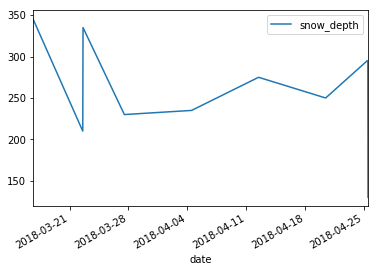

In [4]:
obs.plot(x='date', y='snow_depth')

## Merging Elevation Data
Elevation data can be added to a dataframe by calling `mh.merge_el_data` with the desired dataframe passed as an argument. Example shown below.

In [10]:
obs = mh.merge_el_data(obs)
display(obs)

,author_name,date,id,lat,long,snow_depth,timestamp,type,elevation
0,Sarah Carter,2018-05-27 14:53:34.400,5b0b290ad5cf8505a55f489a,61.140901,-145.795780,174.999993,1527458014400,snow_conditions,1540.082520
1,Emily Baker,2018-05-22 16:31:54.162,5b05eee0d5cf8505a51d35a5,60.370256,-148.896930,25.000000,1527031914162,snow_conditions,364.587708
2,Emily Baker,2018-05-22 15:49:53.008,5b05eecfd5cf8505a51d355f,60.370591,-148.894071,0.000000,1527029393008,snow_conditions,363.361664
3,Emily Baker,2018-05-22 15:39:33.668,5b05ef4f687dad1c894ec4c8,60.370590,-148.893801,35.000000,1527028773668,snow_conditions,363.586060
4,Emily Baker,2018-05-22 14:32:05.726,5b05ef45687dad1c894ec4b5,60.369863,-148.897642,53.000000,1527024725726,snow_conditions,367.343628
5,Elizabeth Kimberly,2018-05-20 11:31:18.229,5b0311fcd5cf8505a57819c8,48.746302,-121.834056,500.000000,1526841078229,snow_conditions,2009.764648
6,Benjamin Schulz,2018-05-18 12:22:25.071,5b11716fd5cf8505a502e777,42.316350,-122.091065,121.920000,1526671345071,snow_conditions,2415.461426
7,Sean Callan,2018-05-16 13:18:14.904,5afc92af687dad1c890837b6,43.507216,-110.950107,102.000000,1526501894904,snow_conditions,3071.926270
8,Sean Callan,2018-05-14 18:10:52.625,5afa33a67b1c887a07c44c63,43.507026,-110.949877,103.000000,1526346652625,snow_conditions,3072.686768


## Plotting Elevation Data
Elevation data can be added onto an existing plot as seen below.

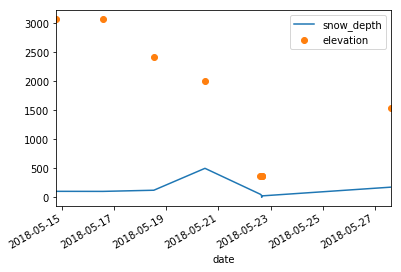

In [11]:
plt = obs.plot(x='date', y='snow_depth')
obs.plot(x='date', y='elevation', style='o', ax=plt)